In [2]:
# 添加库
import pandas as pd
import numpy as np
import sys,warnings,time,pickle
from sklearn.model_selection import StratifiedKFold,KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn import metrics,svm
from sklearn.datasets import dump_svmlight_file
from xgboost import plot_importance,XGBClassifier
from matplotlib import pyplot
from sklearn import metrics
from collections import Counter
import lightgbm as lgb
from lightgbm import LGBMClassifier,LGBMRegressor
import matplotlib.pyplot as plt  
warnings.filterwarnings("ignore")

In [3]:
feather_path_list = list([None for i in range(110)])
feather_path_list[0] = "./DataSet/SpiltToNumeric/numeric_data.csv"
feather_path_list[1] = "./DataSet/DealAllString/time_0_factorize.csv"
feather_path_list[2] = "./DataSet/DealAllString/time_1_factorize.csv"
feather_path_list[3] = "./DataSet/DealAllString/time_2_factorize.csv"
feather_path_list[4] = "./DataSet/DealAllString/Col0-3.csv"
feather_path_list[5] = "./DataSet/DealAllString/Col4half.csv"
feather_path_list[6] = "./DataSet/DealAllString/Col4half2.csv"
feather_path_list[7] = "./DataSet/DealAllString/Col5half.csv"
feather_path_list[8] = "./DataSet/DealAllString/Col5half2.csv"
feather_path_list[9] = "./DataSet/DealAllString/Col6.csv"
feather_path_list[10] = "./DataSet/DealAllString/Col7.csv"
feather_path_list[11] = "./DataSet/DealAllString/Col8half.csv"
feather_path_list[12] = "./DataSet/DealAllString/Col8half2.csv"
feather_path_list[13] = "./DataSet/DealAllString/Col9half.csv"
feather_path_list[14] = "./DataSet/DealAllString/Col9half2.csv"
feather_path_list[15] = "./DataSet/DealAllString/Col10half.csv"
feather_path_list[16] = "./DataSet/DealAllString/Col10half2.csv"
feather_path_list[17] = "./DataSet/DealAllString/Col11half.csv"
feather_path_list[18] = "./DataSet/DealAllString/Col11half2.csv"
feather_path_list[19] = "./DataSet/DealAllString/Col12half.csv"
feather_path_list[20] = "./DataSet/DealAllString/Col12half2.csv"
feather_path_list[21] = "./DataSet/DealAllString/Col13half.csv"
feather_path_list[22] = "./DataSet/DealAllString/Col13half2.csv"
feather_path_list[23] = "./DataSet/DealAllString/Col14half.csv"
feather_path_list[24] = "./DataSet/DealAllString/Col14half2.csv"
feather_path_list[25] = "./DataSet/DealAllString/Col15half.csv"
feather_path_list[26] = "./DataSet/DealAllString/Col15half2.csv"
feather_path_list[27] = "./DataSet/DealAllString/Col16half.csv"
feather_path_list[28] = "./DataSet/DealAllString/Col16half2.csv"
feather_path_list[29] = "./DataSet/DealAllString/Col17half.csv"
feather_path_list[30] = "./DataSet/DealAllString/Col17half2.csv"
feather_path_list[31] = "./DataSet/DealAllString/Col18half.csv"
feather_path_list[32] = "./DataSet/DealAllString/Col18half2.csv"
feather_path_list[33] = "./DataSet/DealAllString/Col19half.csv"
feather_path_list[34] = "./DataSet/DealAllString/Col19half2.csv"
feather_path_list[35] = "./DataSet/DealAllString/Col20half.csv"
feather_path_list[36] = "./DataSet/DealAllString/Col20half2.csv"
feather_path_list[37] = "./DataSet/DealAllString/Col21half.csv"
feather_path_list[38] = "./DataSet/DealAllString/Col21half2.csv"
feather_path_list[39] = "./DataSet/DealAllString/Col22half.csv"
feather_path_list[40] = "./DataSet/DealAllString/Col22half2.csv"
feather_path_list[41] = "./DataSet/DealAllString/Col23half.csv"
feather_path_list[42] = "./DataSet/DealAllString/Col23half2.csv"
feather_path_list[43] = "./DataSet/DealAllString/Col24quarter1.csv"
feather_path_list[44] = "./DataSet/DealAllString/Col24quarter2.csv"
feather_path_list[45] = "./DataSet/DealAllString/Col24quarter3.csv"
feather_path_list[46] = "./DataSet/DealAllString/Col24quarter4.csv"
feather_path_list[47] = "./DataSet/DealAllString/Col25quarter1.csv"
feather_path_list[48] = "./DataSet/DealAllString/Col25quarter2.csv"
feather_path_list[49] = "./DataSet/DealAllString/Col25quarter3.csv"
feather_path_list[50] = "./DataSet/DealAllString/Col25quarter4.csv"
feather_path_list[51] = "./DataSet/DealAllString/All_Factorize.csv"
feather_path_list[52] = "./DataSet/TrickData/trick1-4.csv"
feather_path_list[53] = "./DataSet/TrickData/trick5-8.csv"
feather_path_list[54] = "./DataSet/TrickData/trick9-12.csv"
feather_path_list[55] = "./DataSet/TrickData/trick13-16.csv"
feather_path_list[56] = "./DataSet/TrickData/trick17-20.csv"
# feather_path_list[57] = "./DataSet/TrickData/trick24,26,28,30min.csv"
feather_path_list[58] = "./DataSet/TrickData/trick24,26,28,30mean.csv"
# feather_path_list[59] = "./DataSet/TrickData/trick25,27,29,31min.csv"
feather_path_list[60] = "./DataSet/TrickData/trick25,27,29,31mean.csv"
# feather_path_list[61] = "./DataSet/TrickData/trick32,35,38,41,44,47min.csv"
feather_path_list[62] = "./DataSet/TrickData/trick32,35,38,41,44,47mean.csv"
# feather_path_list[63] = "./DataSet/TrickData/trick33,36,39,42,45,48min.csv"
feather_path_list[64] = "./DataSet/TrickData/trick33,36,39,42,45,48mean.csv"
# feather_path_list[65] = "./DataSet/TrickData/trick34,37,40,43,46,49min.csv"
feather_path_list[66] = "./DataSet/TrickData/trick34,37,40,43,46,49mean.csv"
# feather_path_list[67] = "./DataSet/TrickData/trick59,62,66,70,74,78,81min.csv"
feather_path_list[68] = "./DataSet/TrickData/trick59,62,66,70,74,78,81mean.csv"
# feather_path_list[69] = "./DataSet/TrickData/trick60,63,67,71,75,79,82min.csv"
feather_path_list[70] = "./DataSet/TrickData/trick60,63,67,71,75,79,82mean.csv"
# feather_path_list[72] = "./DataSet/TrickData/trick61,64,65,69,73,77,80,84min.csv"
feather_path_list[73] = "./DataSet/TrickData/trick61,64,65,69,73,77,80,84mean.csv"
# feather_path_list[74] = "./DataSet/TrickData/trick68,72,76,83min.csv"
feather_path_list[75] = "./DataSet/TrickData/trick68,72,76,83mean.csv"
# feather_path_list[76] = "./DataSet/TrickData/trick85,86,87min.csv"
feather_path_list[77] = "./DataSet/TrickData/trick85,86,87mean.csv"
# feather_path_list[78] = "./DataSet/TrickData/trick94,95,96,97,98,99,100min.csv"
feather_path_list[79] = "./DataSet/TrickData/trick94,95,96,97,98,99,100mean.csv"
feather_path_list[80] = "./DataSet/TrickData/trick103,105,108,110.csv"
feather_path_list[81] = "./DataSet/TrickData/trick106,111mean.csv"
feather_path_list[82] = "./DataSet/TrickData/trick113,115mean.csv"
feather_path_list[83] = "./DataSet/TrickData/trick118,121mean.csv"
feather_path_list[84] = "./DataSet/TrickData/trick123,125mean.csv"
feather_path_list[85] = "./DataSet/TrickData/trick127,129mean.csv"
feather_path_list[86] = "./DataSet/TrickData/trick131,133mean.csv"
feather_path_list[87] = "./DataSet/TrickData/trick135,137mean.csv"
feather_path_list[88] = "./DataSet/TrickData/trick140,142mean.csv"
feather_path_list[89] = "./DataSet/TrickData/trick145,147mean.csv"
feather_path_list[90] = "./DataSet/TrickData/trick149,151mean.csv"
feather_path_list[91] = "./DataSet/TrickData/trick153,155mean.csv"
feather_path_list[92] = "./DataSet/TrickData/trick156,157.csv"
# feather_path_list[93] = "./DataSet/TrickData/trick161,162,163,164min.csv"
feather_path_list[94] = "./DataSet/TrickData/trick161,162,163,164mean.csv"
# feather_path_list[95] = "./DataSet/TrickData/trick165,166,167,168,169,min.csv"
feather_path_list[96] = "./DataSet/TrickData/trick165,166,167,168,169mean.csv"
# feather_path_list[97] = "./DataSet/TrickData/trick170,171,172,173,174,175,176,177,178min.csv"
feather_path_list[98] = "./DataSet/TrickData/trick170,171,172,173,174,175,176,177,178mean.csv"
# feather_path_list[99] = "./DataSet/TrickData/trick179,180,181,186min.csv"
feather_path_list[100] = "./DataSet/TrickData/trick179,180,181,186mean.csv"
# feather_path_list[101] = "./DataSet/TrickData/trick182,183,184,185min.csv"
feather_path_list[102] = "./DataSet/TrickData/trick182,183,184,185mean.csv"

In [4]:
feather_list = list()
for i in feather_path_list:
    if i == None:
        continue
    temp = pd.read_csv(i, header=None)
    feather_list.append(temp)
all_data = pd.concat(feather_list,axis=1)
all_data.columns = range(len(all_data.columns))
train_label = pd.read_csv("./DataSet/Standardlize/train_label.csv",header=None)
train_count = len(train_label)
train_data = all_data.iloc[:train_count, :]
test_data = all_data.iloc[train_count:, :]
X = train_data.values
y = train_label.replace(-1,0).values.squeeze()
test = test_data.values

In [5]:
skf = StratifiedKFold(n_splits=5,shuffle=True)
X = pd.DataFrame(X).fillna('-1').values
test = pd.DataFrame(test).fillna('-1').values 
RF_model = RandomForestClassifier(bootstrap=True,n_jobs=32,max_depth=12,n_estimators=170)
for train_index, test_index in skf.split(X, y):
    X_train, X_vali = X[train_index], X[test_index]
    y_train, y_vali = y[train_index], y[test_index]
    RF_model.fit(X_train, y_train)
    result = RF_model.predict_proba(X_vali)[:,1]
    vali_auc = metrics.roc_auc_score(y_vali,result)
    print ("vali_auc:"+str(vali_auc))

vali_auc:0.81650398994
vali_auc:0.815095150975
vali_auc:0.817195307522
vali_auc:0.815171163531
vali_auc:0.819167634372


 1) 0                              0.041807
 2) 1                              0.029184
 3) 2                              0.024146
 4) 3                              0.023709
 5) 4                              0.020958
 6) 5                              0.020140
 7) 6                              0.019588
 8) 7                              0.018946
 9) 8                              0.016942
10) 9                              0.016540
11) 10                             0.016305
12) 11                             0.014181
13) 12                             0.012987
14) 13                             0.012537
15) 14                             0.012414
16) 15                             0.011704
17) 16                             0.010614
18) 17                             0.010351
19) 18                             0.010144
20) 19                             0.009904
21) 20                             0.009257
22) 21                             0.008962
23) 22                          

435) 434                            0.000049
436) 435                            0.000047
437) 436                            0.000046
438) 437                            0.000046
439) 438                            0.000045
440) 439                            0.000044
441) 440                            0.000043
442) 441                            0.000040
443) 442                            0.000033
444) 443                            0.000033
445) 444                            0.000030
446) 445                            0.000030
447) 446                            0.000027
448) 447                            0.000027
449) 448                            0.000026
450) 449                            0.000020
451) 450                            0.000020
452) 451                            0.000020
453) 452                            0.000019
454) 453                            0.000018
455) 454                            0.000017
456) 455                            0.000016
457) 456  

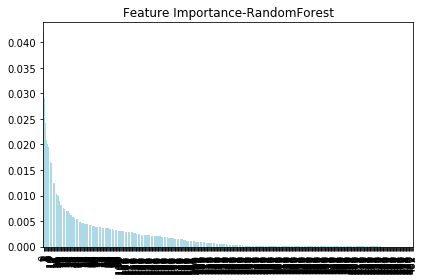

In [7]:
importances=RF_model.feature_importances_ 
indices=np.argsort(importances)[::-1]
feat_labels=train_data.columns
for f in range(X_train.shape[1]):
    print ("%2d) %-*s %f" % (f+1,30,feat_labels[f],importances[indices[f]]) )  
plt.title('Feature Importance-RandomForest')  
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')  
plt.xticks(range(X_train.shape[1]),feat_labels,rotation=90)  
plt.xlim([-1,X_train.shape[1]])  
plt.tight_layout()
plt.savefig("filename.png",dpi=500)
plt.show()